# Fractal Dimension of Percolation Clusters
## Packages

In [3]:
include("../Percolation.jl")
using Plots, ColorSchemes, LaTeXStrings, DelimitedFiles
import PyPlot as plt

## Configurations

In [4]:
figpath = "../../fig/percolation/"
rcParams = plt.PyDict(plt.matplotlib["rcParams"])
rcParams["text.usetex"] = true

true

## Visualization

In [33]:
prob = 0.65
percent = Integer(round(prob * 100))
cluster = Percolation.genclust(prob)

open("fractal-data/fractal-sample-$percent.txt", "w") do io
    writedlm(io, cluster)
end

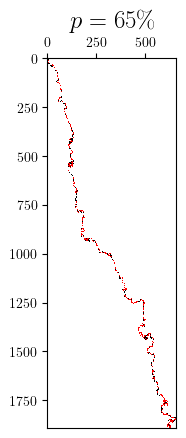

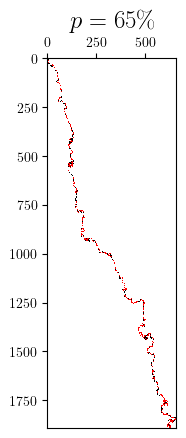

In [34]:
fig, ax = plt.subplots()
ax.xaxis.tick_top()
ax.set_title(L"p=%$percent\%", fontsize=18)
ax.imshow(cluster, cmap=plt.ColorMap([colorant"transparent", colorant"red", colorant"black"]),
    interpolation="nearest")

plt.savefig(figpath * "fractal-vis-$percent.pdf", bbox_inches="tight")
display(fig)

## Dimension

In [68]:
prob, runs = 0.5, 10000
percent = Integer(round(prob * 100))

sizes = Vector{Float64}(undef, runs)
ξs = Vector{Float64}(undef, runs)

10000-element Vector{Float64}:
 1.1117592392303306e171
 8.056710975303142e-90
 2.2547223482821762e243
 5.057279444656571e-32
 1.386252339864293e-12
 9.946072990815043e-43
 1.5144526667651567e-47
 5.378946731850947e241
 5.292497559719688e199
 1.3980260832239554e-76
 1.7101031954640945e214
 9.416577192474592e-144
 5.225872610055353e-143
 ⋮
 2.149990966992003
 1.1838937281198394
 1.8449674080596357
 2.8321855596024808
 3.2767658194496168
 0.19242291045271423
 3.2057962236638073
 1.280536409072705
 1.80992859026332
 3.7612646588304885
 1.5895517394060572
 2.3355884807042337

In [51]:
for run in 1:runs
    cluster = Percolation.genclust(prob)
    s, ξ = Percolation.clustfractal(cluster)
    sizes[run] = s
    ξs[run] = ξ
end

open("fractal-data/fractal-$percent.txt", "w") do io
    writedlm(io, [ξs sizes])
end

In [69]:
# load data from previous runs
data = readdlm("fractal-data/fractal-$percent.txt")
ξs, sizes = data[:, 1], data[:, 2]

([1.355261854357877, 5.126131311449427, 3.4234264365972376, 0.0, 9.334340244119044, 7.122535298470882, 1.118033988749895, 5.197692987922066, 0.9354143466934853, 1.2930100540985752  …  0.6666666666666667, 8.382337739288081, 1.324802642213672, 14.23893502440426, 8.246588328252454, 0.82915619758885, 4.9080162027926315, 3.4136285621831015, 6.925335566188676, 6.623757980652501], [7.0, 60.0, 43.0, 1.0, 164.0, 106.0, 4.0, 44.0, 4.0, 8.0  …  3.0, 217.0, 7.0, 538.0, 182.0, 4.0, 64.0, 39.0, 109.0, 91.0])

In [70]:
slog = log.(sizes)
ξlog = log.(ξs)
# remove invalid data
filter!(x -> x > 0, slog)
filter!(!isinf, ξlog)

# crop constant data
ξlog = [ξlog[i] for i in 1:length(ξlog) if slog[i] <= 8.5]
filter!(x -> x <= 8.5, slog)

n = length(slog)

dim, coeff = hcat(ξlog, ones(n)) \ slog
error = √(sum(x->x^2, slog - dim * ξlog .- coeff) / (n - 2)
    / sum(x->x^2, ξlog .- mean(ξlog)))
print(dim, ' ', error)

1.5847238341563272 0.007781299149340027

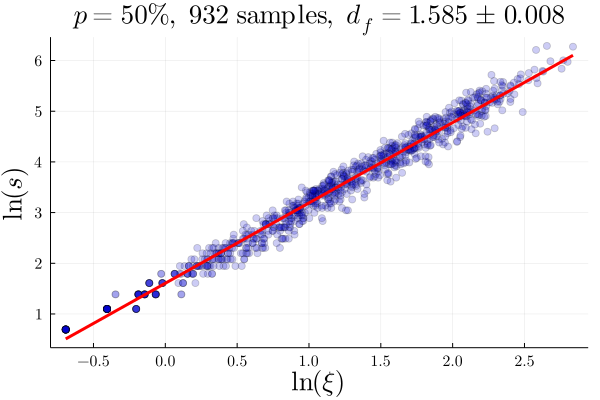

In [71]:
p = scatter(ξlog, slog, alpha=0.2,  color=:mediumblue, legend=false,
    title=L"p=%$percent\%,\ \textrm{%$n\ samples,\ } d_f=%$(round(dim, digits=3)) \pm %$(round(error, sigdigits=1))",
    xlabel=L"\mathrm{ln}(\xi)", ylabel=L"\mathrm{ln}(s)",
    fontfamily="Computer Modern", titlefontsize=18, tickfontsize=10, labelfontsize=18)
plot!(p, x -> dim * x + coeff, lw=3, color=:red)

savefig(p, figpath * "fractal-$percent.pdf")
display(p)